In [ ]:
#PR: CUSTOMER SEGMENTATION USING DBSCAN 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('Mall_Customers.csv')

In [2]:
print("No. of rows and cols:", data.shape)
print("\nColumns:", data.columns)

No. of rows and cols: (200, 5)

Columns: Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [7]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
data = data.drop_duplicates()
print("No. of rows and cols after removing duplicates: ", data.shape)

No. of rows and cols after removing duplicates:  (200, 5)


In [9]:
#SELECT RELEVANT FEATURES & STANDARDIZE DATA
from sklearn.preprocessing import StandardScaler

selected_features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_features)

In [10]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(scaled_data)

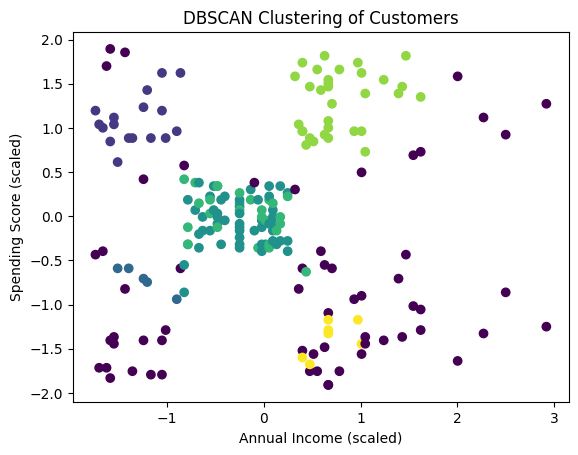

In [11]:
import matplotlib.pyplot as plt

plt.scatter(scaled_data[:, 1], scaled_data[:, 2], c=clusters, cmap='viridis', marker='o')  # Using Income and Spending Score for plot
plt.title('DBSCAN Clustering of Customers')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.show()

In [12]:
unique_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
noise_points = list(clusters).count(-1)
print(f"Number of clusters: {unique_clusters}")
print(f"Number of noise points: {noise_points}")

Number of clusters: 6
Number of noise points: 60


In [ ]:
#The DBSCAN clustering reveals six distinct customer segments and 60 noise points. Here's a quick breakdown:
#High Income, High Spending: Wealthy customers who spend significantly—ideal for premium products or services.
#Low Income, Low Spending: Budget-conscious customers, who would respond well to discounts and economical offerings.
#Moderate Income, Moderate Spending: Middle-tier customers, balanced in both income and spending, could be swayed by competitive pricing.
#High Income, Low Spending: Customers with the potential to spend more but currently don’t. Target them with personalized promotions or loyalty programs.
#Low Income, High Spending: Aspirational shoppers who may stretch their budgets for specific products. Focus on aspirational branding or installment offers.